In [1]:
import pandas as pd
import numpy as np

In [2]:
BASE_FOLDER = './outputs/evaluation'

In [35]:
def load_data(prefix, traffic):
    df_single_episode = pd.read_csv(f'{BASE_FOLDER}/{prefix}_1_episode_{traffic}.csv')
    df_single_episode = df_single_episode.set_index('step')
    df_single_episode = df_single_episode.drop(columns=['cumulative_reward'])
    
    df_multiple_episodes = pd.read_csv(f'{BASE_FOLDER}/{prefix}_100_episode_{traffic}.csv')
    df_multiple_episodes = df_multiple_episodes.set_index('episode')
    # df_multiple_episodes = df_multiple_episodes.drop(columns=['cumulative_reward'])
    return df_single_episode, df_multiple_episodes

def compare_datasets(datasets):
    results = []
    for name, df in datasets:
        data = {
            'dataset': name,
            'avg_cumulative_reward': np.mean(df.cumulative_reward.to_list()),
            # 'mean_waiting_time': np.mean(df.mean_waiting_time.to_list()),
            
            'avg_travel_time': np.mean(df.avg_travel_time.to_list()),
            'avg_time_loss': np.mean(df.avg_time_loss.to_list()),
            'avg_waiting_time': np.mean(df.avg_waiting_time.to_list()),

            'collisions': np.mean(df.collisions.to_list()),
            'emergency_braking': np.mean(df.emergency_braking.to_list()),
            'emergency_stops': np.mean(df.emergency_stops.to_list()),

#             'mean_speed': np.mean(df.mean_speed.to_list()),
            'mean_lane_density': np.mean(df.mean_lane_density.to_list()),
            'mean_queue': np.mean(df.mean_queue_length.to_list()),

        }
        results.append(data)
    return pd.DataFrame(results)

In [4]:
df_single_episode_ppo, df_multiple_episodes_ppo = load_data('ppo_500k_steps', 'custom-2way-single-intersection')

In [5]:
df_single_episode_oc, df_multiple_episodes_oc = load_data('oc_2way_500k_steps', 'custom-2way-single-intersection')

In [6]:
df_single_episode_oc_mil, df_multiple_episodes_oc_mil = load_data('oc_1mil_steps', 'custom-2way-single-intersection')

In [7]:
df_single_episode_forced, df_multiple_episodes_forced = load_data('oc_forced_500k_steps', 'custom-2way-single-intersection')

In [8]:
df_single_episode_hd, df_multiple_episodes_hd = load_data('oc_hd_500k_steps', 'custom-2way-single-intersection')

In [9]:
df_single_episode_cost, df_multiple_episodes_cost = load_data('oc_cost_500k_steps', 'custom-2way-single-intersection')

In [13]:
df_single_episode_hd_sum, df_multiple_episodes_hd_sum = load_data('oc_hd_sum_steps', 'custom-2way-single-intersection')

In [ ]:
compare_datasets([
    ('ppo', df_multiple_episodes_ppo),
    ('option-critic', df_multiple_episodes_oc),
    ('option-critic-1mil', df_multiple_episodes_oc),
    ('option-critic-forced', df_multiple_episodes_forced),
    ('option-critic-hellinger-distance', df_multiple_episodes_hd),
    ('option-critic-hellinger-distance-sum', df_multiple_episodes_hd_sum),
    ('option-critic-deliberation_cost', df_multiple_episodes_cost),
])

In [36]:
traffic_scenario = 'cologne1'
prefix = ['fixed_period_15_steps', 'fixed_period_30_steps', 'dqn_cologne1', 'ppo_cologne1']
datasets = [(p, load_data(p, traffic_scenario)[1]) for p in prefix]
compare_datasets(datasets)

,dataset,avg_cumulative_reward,avg_travel_time,avg_time_loss,avg_waiting_time,collisions,emergency_braking,emergency_stops,mean_lane_density,mean_queue
0,fixed_period_15_steps,-25186.18,91.996109,69.0444,49.0154,0.0,0.01,0.0,2.287746,26.686722
1,fixed_period_30_steps,-29157.22,103.863111,80.9292,63.7006,0.0,0.00,0.0,2.815149,33.780139
2,dqn_cologne1,-5550.05,42.615365,19.8073,6.7848,0.0,0.29,0.0,0.924120,3.374903
3,ppo_cologne1,-6547.08,45.435389,22.6350,8.7755,0.0,0.42,0.0,1.000176,4.384847


In [32]:
traffic_scenario = 'cologne1'
prefix = 'dqn_cologne1'
df_single_episode, df_multiple_episodes = load_data(prefix, traffic_scenario)
datasets = [(prefix, df_multiple_episodes)]
compare_datasets(datasets)

,dataset,avg_cumulative_reward,avg_travel_time,avg_time_loss,avg_waiting_time,mean_lane_density,mean_queue
0,dqn_cologne1,-5558.13,42.699756,19.8797,6.8324,0.925802,3.387014


<AxesSubplot: xlabel='step'>

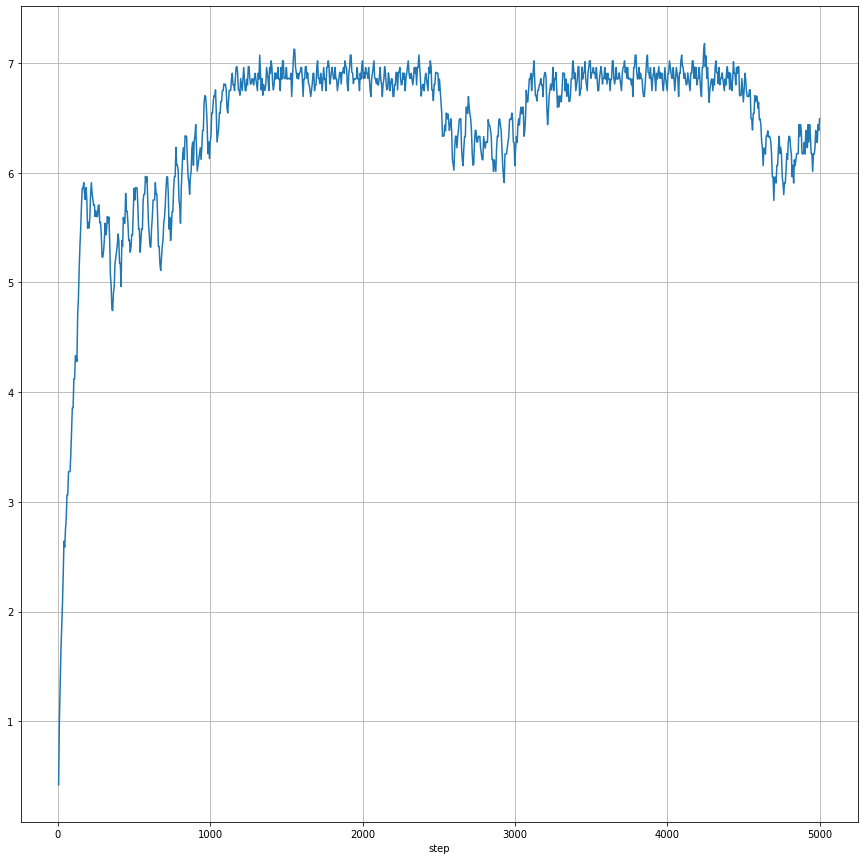

In [16]:
df_single_episode_oc.lane_density.plot(grid=True, figsize=(15,15))

In [ ]:
# Verify that the metrics are stable across multiple episodes